In [1]:
import sys
sys.path.append('../src')

from KBSA import *

In [2]:
muX = -.03; sigX = .2; sigY = .3; delta = .2; gamma = .8
rho = .95

def generate_rv(theta,case):
    X = random.normalvariate(theta, sigX)
    xi = sigY*(rho*(X-theta)/sigX+(1-rho**2)**.5*random.normalvariate(0, 1))
    Y = delta*X+.5*gamma*X**2+xi 
    return Y, X

def evaluate(theta, case):
    return None
    
# pair=[generate_rv(muX) for i in range(int(1e3))]
# Y = [p[0] for p in pair]
# X = [p[1] for p in pair]

In [3]:
q=lambda theta, X, v:.95-I(X, v)
m=[lambda theta, Y, l:.95-I(Y, l),
  lambda theta, Y, l:(Y-l[1])*(1-I(Y, l[0]))]

### compute true values

In [4]:
v_true = muX+norm.ppf(.95)*sigX
dv_true = 1

l1_true = delta*v_true+.5*gamma*v_true**2+sigY*(rho*norm.ppf(.95)+(1-rho**2)**.5*norm.ppf(.95))
dl1_true = delta*dv_true+gamma*v_true*dv_true

CVaR_xi = norm.expect(lb=norm.ppf(.95),ub=np.inf)/.05
l2_true = delta*v_true+.5*gamma*v_true**2+sigY*(rho*norm.ppf(.95)+(1-rho**2)**.5*CVaR_xi)
dl2_true = delta*dv_true+gamma*v_true*dv_true

In [5]:
def alg_para():
    a = lambda i:0
    b = lambda i: 3/(i+1)
    bb = lambda i: 3/(i+1)
    b1 = [lambda i: 3/(i+1),
         lambda i: 50/(i+1)]
    bb1 = [lambda i: 3/(i+1),
          lambda i: 50/(i+1)]   
    c = lambda i: 3/(i+1)**(1/8)
    h = [lambda i: .08/(i+1)**(1/5),
        lambda i: .08/(i+1)**(1/8)]
    return a,b,bb,b1,bb1,c,h

### implementation

In [17]:
N = int(1e5)
with np.errstate(invalid='raise'):
    try:
        d=1
        l0,v0,Gv0,Gl0 = [[np.zeros(1)],[np.zeros(1)]],[np.zeros(1)],[np.ones(d)],[[np.ones(d)],[np.ones(d)]]
        theta0 = [np.array([muX])]
        l_set=[[-1,1]]; v_set=[[-1,1]]
        Gv_set=[[-1,1]]; Gl_set=[[-1,1]]
        theta_set=[[-1,1]]
        a,b,bb,b1,bb1,c,h=alg_para()
        l1, v1, Gv1, Gl1, theta1, fs1, RT1 = KBSA(N, d, l0,v0,Gv0,Gl0,theta0,
                                                  l_set,v_set,Gv_set,Gl_set,theta_set,
                                                  a,b,bb,b1,bb1,c,h,
                                                  q,m,generate_rv,evaluate)
    except FloatingPointError:
        print('Error: Division by Zero')

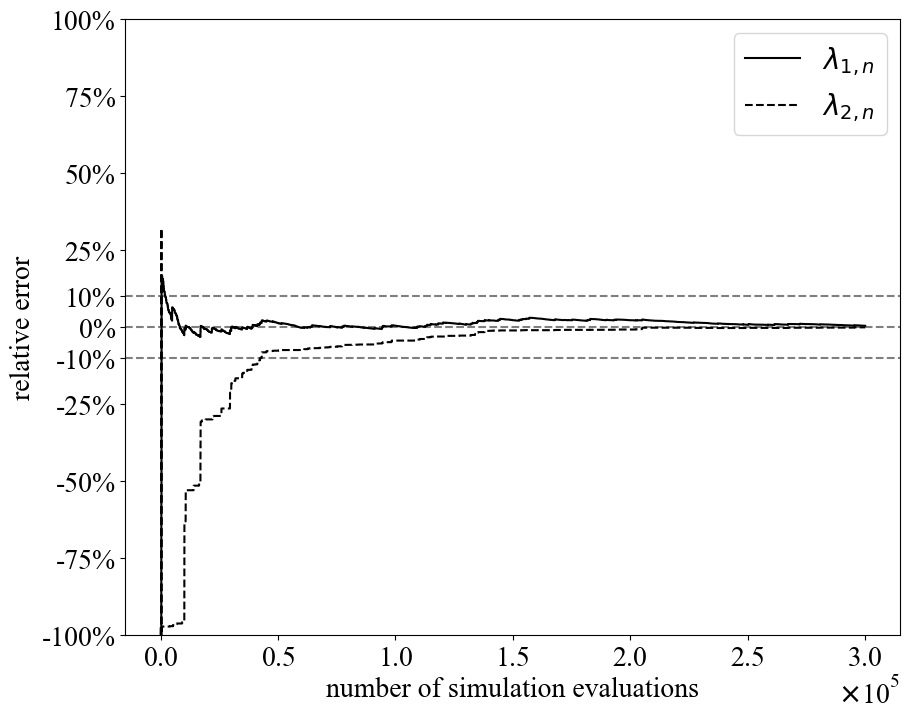

In [18]:
style=itertools.cycle(["-","--","-.",":"])
num_eva=[x*3 for x in range(N)]

bias = [(l_-l1_true)/abs(l1_true) for l_ in l1[0]]
plt.plot(num_eva, bias[1:], label = r'$\lambda_{1,n}$', color='k', linestyle = next(style)) 

bias = [(l_-l2_true)/abs(l2_true) for l_ in l1[1]]
plt.plot(num_eva, bias[1:], label = r'$\lambda_{2,n}$', color='k', linestyle = next(style)) 

plt.axhline(0, color = 'k', alpha = .5, linestyle = '--')
plt.axhline(0.1, color = 'k', alpha = .5, linestyle = '--')
plt.axhline(-0.1, color = 'k', alpha = .5, linestyle = '--')
plt.ylim(-1,1)
plt.legend()
plt.yticks([-1,-.75,-.5,-.25,-.1, 0, 
            .1,.25,.5,.75,1])
plt.ylabel('relative error')
plt.xlabel(r'number of simulation evaluations')
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0),useMathText=True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# plt.savefig('../results/converge_portfolio_measures.pdf')
plt.show()

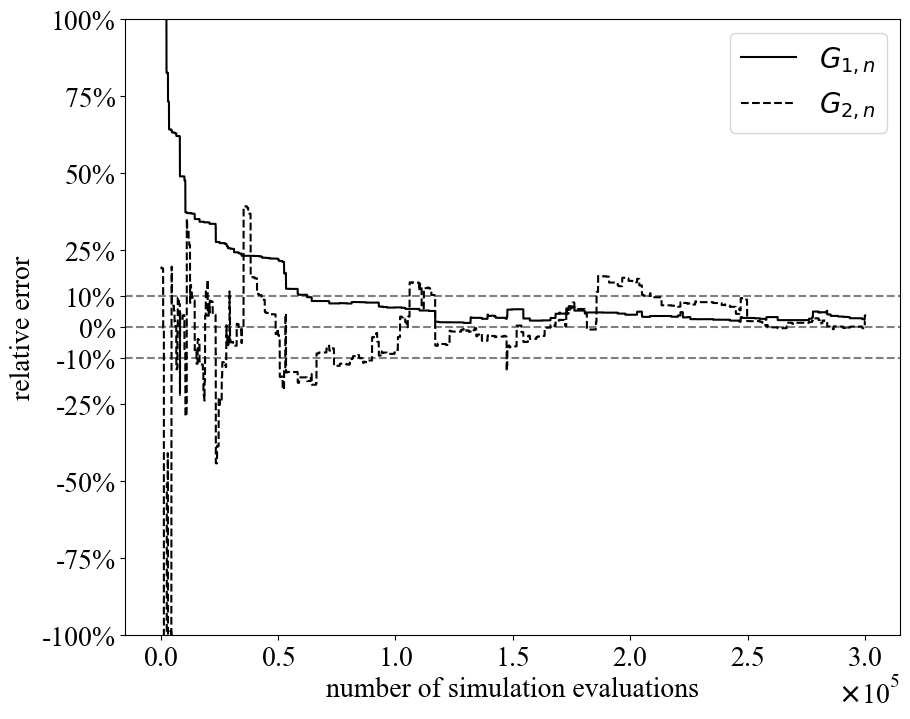

In [19]:
style=itertools.cycle(["-","--","-.",":"])
num_eva=[x*3 for x in range(N)]

bias = [(Dl1_-dl1_true)/abs(dl1_true) for Dl1_ in Gl1[0]]
plt.plot(num_eva, bias[1:], label = r'$G_{1,n}$', color='k', linestyle = next(style))

bias = [(Dl_-dl2_true)/abs(dl2_true) for Dl_ in Gl1[1]]
plt.plot(num_eva, bias[1:], label = r'$G_{2,n}$', color='k', linestyle = next(style))

plt.axhline(0, color = 'k', alpha = .5, linestyle = '--')
plt.axhline(0.1, color = 'k', alpha = .5, linestyle = '--')
plt.axhline(-0.1, color = 'k', alpha = .5, linestyle = '--')
plt.ylim(-1,1)
plt.legend()
plt.yticks([-1,-.75,-.5,-.25,-.1, 0, 
            .1,.25,.5,.75,1])
plt.ylabel('relative error')
plt.xlabel('number of simulation evaluations')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0),useMathText=True)
# plt.savefig('../results/converge_portfolio_gradients.pdf')
plt.show()

### Replications

In [6]:
d=1
l0,v0,Gv0,Gl0 = [[np.zeros(1)],[np.zeros(1)]],[np.zeros(1)],[np.ones(d)],[[np.ones(d)],[np.ones(d)]]
theta0 = [np.array([muX])]
l_set=[[-1,1]]; v_set=[[-1,1]]
Gv_set=[[-1,1]]; Gl_set=[[-1,1]]
theta_set=[[-1,1]]
a,b,bb,b1,bb1,c,h=alg_para()

l1_lst3, Gl1_lst3, theta1_lst3, fs1_lst3, \
l1_lst4, Gl1_lst4, theta1_lst4, fs1_lst4, \
l1_lst5, Gl1_lst5, theta1_lst5, fs1_lst5, \
l1_lst6, Gl1_lst6, theta1_lst6, fs1_lst6, RT_lst=replication(d, l0,v0,Gv0,Gl0,theta0,
                                                  l_set,v_set,Gv_set,Gl_set,theta_set,
                                                  a,b,bb,b1,bb1,c,h,
                                                  q,m,generate_rv,evaluate)

In [7]:
with open('../results/portfolio.pkl', 'wb') as file: 
    joblib.dump([l1_lst3, Gl1_lst3, theta1_lst3, fs1_lst3,
                 l1_lst4, Gl1_lst4, theta1_lst4, fs1_lst4,
                 l1_lst5, Gl1_lst5, theta1_lst5, fs1_lst5, 
                 l1_lst6, Gl1_lst6, theta1_lst6, fs1_lst6, RT_lst], file) 

### descriptive statistics

In [6]:
with open('../results/portfolio.pkl', 'rb') as file: 
    l1_lst3, Gl1_lst3, theta1_lst3, fs1_lst3, \
    l1_lst4, Gl1_lst4, theta1_lst4, fs1_lst4, \
    l1_lst5, Gl1_lst5, theta1_lst5, fs1_lst5, \
    l1_lst6, Gl1_lst6, theta1_lst6, fs1_lst6, RT_lst=joblib.load(file) 

In [27]:
rlt_error_lst_l1 = [np.mean([(l[0]-l1_true)/abs(l1_true) for l in l1_lst3]),
                   np.mean([(l[0]-l1_true)/abs(l1_true) for l in l1_lst4]),
                   np.mean([(l[0]-l1_true)/abs(l1_true) for l in l1_lst5]),
                   np.mean([(l[0]-l1_true)/abs(l1_true) for l in l1_lst6])]
rlt_error_lst_l2 = [np.mean([(l[1]-l2_true)/abs(l2_true) for l in l1_lst3]),
                   np.mean([(l[1]-l2_true)/abs(l2_true) for l in l1_lst4]),
                   np.mean([(l[1]-l2_true)/abs(l2_true) for l in l1_lst5]),
                   np.mean([(l[1]-l2_true)/abs(l2_true) for l in l1_lst6])]

rlt_error_lst_Gl1 = [np.mean([(l[0]-dl1_true)/abs(l1_true) for l in Gl1_lst3]),
                   np.mean([(l[0]-dl1_true)/abs(l1_true) for l in Gl1_lst4]),
                   np.mean([(l[0]-dl1_true)/abs(l1_true) for l in Gl1_lst5]),
                   np.mean([(l[0]-dl1_true)/abs(l1_true) for l in Gl1_lst6])]
rlt_error_lst_Gl2 = [np.mean([(l[1]-dl2_true)/abs(l2_true) for l in Gl1_lst3]),
                   np.mean([(l[1]-dl2_true)/abs(l2_true) for l in Gl1_lst4]),
                   np.mean([(l[1]-dl2_true)/abs(l2_true) for l in Gl1_lst5]),
                   np.mean([(l[1]-dl2_true)/abs(l2_true) for l in Gl1_lst6])]

mean_lst_RT = np.mean(RT_lst,axis=0)

In [34]:
rmse_lst_l1 = [np.mean([np.linalg.norm(l[0]-l1_true)**2 for l in l1_lst3])**.5,
               np.mean([np.linalg.norm(l[0]-l1_true)**2 for l in l1_lst4])**.5,
               np.mean([np.linalg.norm(l[0]-l1_true)**2 for l in l1_lst5])**.5,
               np.mean([np.linalg.norm(l[0]-l1_true)**2 for l in l1_lst6])**.5]
rmse_lst_l2 = [np.mean([np.linalg.norm(l[1]-l2_true)**2 for l in l1_lst3])**.5,
               np.mean([np.linalg.norm(l[1]-l2_true)**2 for l in l1_lst4])**.5,
               np.mean([np.linalg.norm(l[1]-l2_true)**2 for l in l1_lst5])**.5,
               np.mean([np.linalg.norm(l[1]-l2_true)**2 for l in l1_lst6])**.5]

rmse_lst_Gl1 = [np.mean([np.linalg.norm(l[0]-dl1_true)**2 for l in Gl1_lst3])**.5,
                np.mean([np.linalg.norm(l[0]-dl1_true)**2 for l in Gl1_lst4])**.5,
                np.mean([np.linalg.norm(l[0]-dl1_true)**2 for l in Gl1_lst5])**.5,
                np.mean([np.linalg.norm(l[0]-dl1_true)**2 for l in Gl1_lst6])**.5]
rmse_lst_Gl2 = [np.mean([np.linalg.norm(l[1]-dl2_true)**2 for l in Gl1_lst3])**.5,
                np.mean([np.linalg.norm(l[1]-dl2_true)**2 for l in Gl1_lst4])**.5,
                np.mean([np.linalg.norm(l[1]-dl2_true)**2 for l in Gl1_lst5])**.5,
                np.mean([np.linalg.norm(l[1]-dl2_true)**2 for l in Gl1_lst6])**.5]

In [43]:
print('error(%) of l1:',[round(i,4)*100 for i in rlt_error_lst_l1])
print('error(%) of l2:',[round(i,4)*100 for i in rlt_error_lst_l2])
print('error(%) of Gl1:',[round(i,4)*100 for i in rlt_error_lst_Gl1])
print('error(%) of Gl2:',[round(i,4)*100 for i in rlt_error_lst_Gl2])
print('-'*40)
print('rmse(*.01) of l1:',[round(i,4)*100 for i in rmse_lst_l1])
print('rmse(*.01) of l2:',[round(i,4)*100 for i in rmse_lst_l2])
print('rmse(*.01) of Gl1:',[round(i,4)*100 for i in rmse_lst_Gl1])
print('rmse(*.01) of Gl2:',[round(i,4)*100 for i in rmse_lst_Gl2])
print('-'*40)
print('ART:',[round(i,2) for i in np.mean(RT_lst,axis=0)])

error(%) of l1: [14.04, 3.38, 0.44999999999999996, 0.02]
error(%) of l2: [-33.09, -14.24, -0.31, 0.1]
error(%) of Gl1: [42.89, 7.199999999999999, -0.43, 0.06]
error(%) of Gl2: [-22.84, -3.91, 0.9400000000000001, 0.42]
----------------------------------------
rmse(*.01) of l1: [12.049999999999999, 3.0700000000000003, 0.7100000000000001, 0.27]
rmse(*.01) of l2: [57.16, 29.29, 2.55, 0.3]
rmse(*.01) of Gl1: [32.7, 6.5600000000000005, 1.71, 0.8200000000000001]
rmse(*.01) of Gl2: [59.4, 11.08, 2.16, 0.89]
----------------------------------------
ART: [0.35, 3.65, 35.57, 366.29]


In [44]:
logn=[math.log(1e3),math.log(1e4),math.log(1e5),math.log(1e6)]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=[math.log(x) for x in np.mean(RT_lst,axis=0)])
print('order of ARTs: ',slope)

order of ARTs:  1.0048448546009494


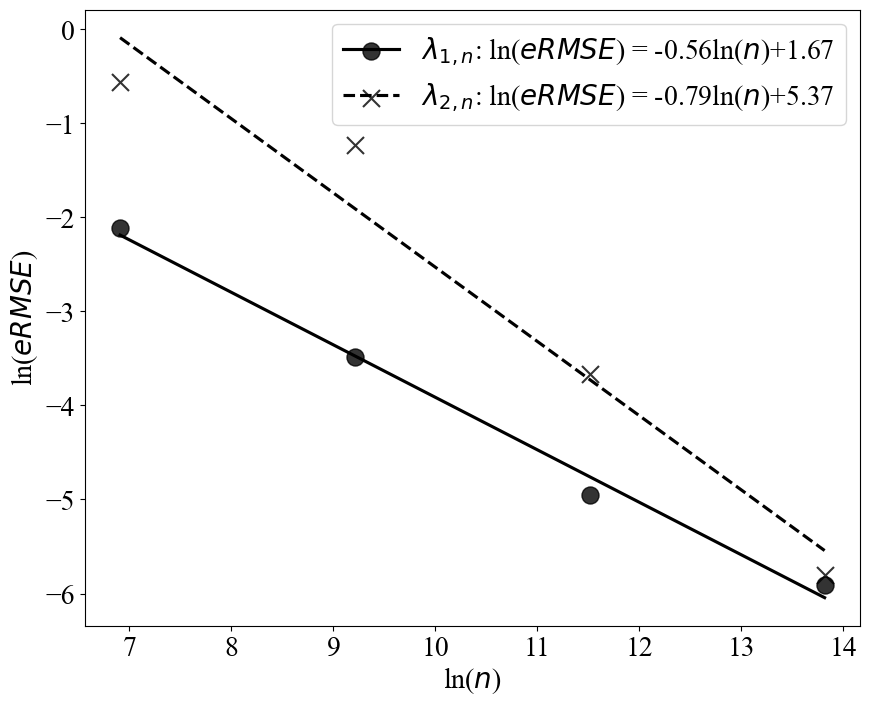

In [57]:
style=itertools.cycle(["-","--","-.",":"])
logn=[math.log(1e3),math.log(1e4),math.log(1e5),math.log(1e6)]

fig, ax = plt.subplots()
logerror=[math.log(rmse) for rmse in rmse_lst_l1]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
sns.regplot(x=logn, y=logerror, ci = None,scatter_kws={'s':150},
           label = r'$\lambda_{1,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2)),
           color='k', line_kws={'linestyle': next(style),'label': r'$\lambda_{1,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},marker='o')

logerror=[math.log(rmse) for rmse in rmse_lst_l2]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
sns.regplot(x=logn, y=logerror, ci = None,scatter_kws={'s':150},
           label = r'$\lambda_{2,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2)),
           color='k', line_kws={'linestyle': next(style),'label': r'$\lambda_{2,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},marker='x')

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right',
           handles=[(h1, h2) for h1, h2 in zip([handles[i] for i in [0,2]], [handles[i] for i in [1,3]])],
           labels=[labels[i] for i in [0,2]])
plt.ylabel('ln($eRMSE$)')
plt.xlabel('ln($n$)')
# plt.savefig('../results/rate_port_m.pdf')
plt.show() 

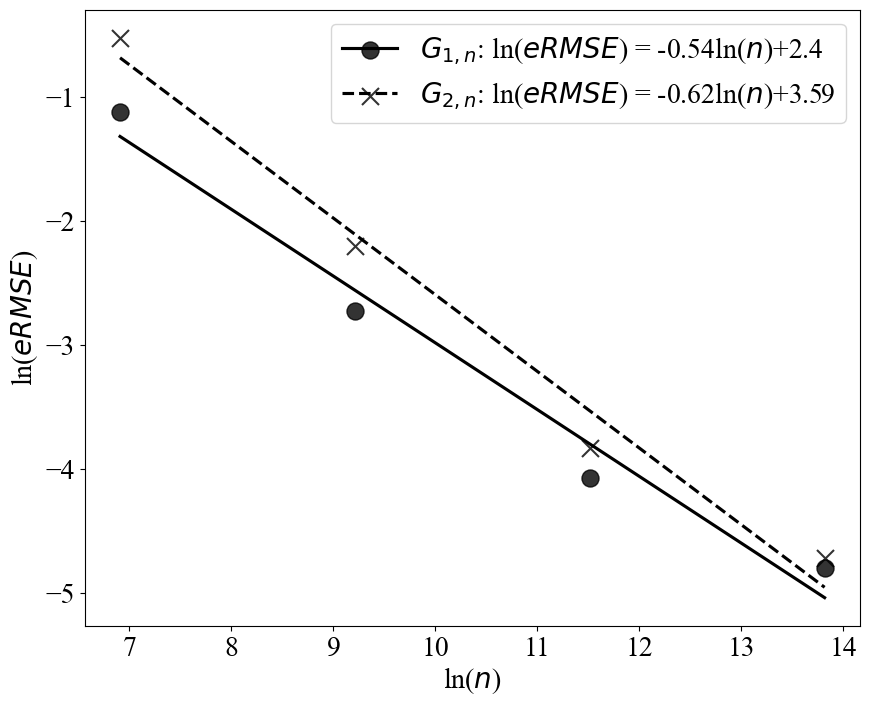

In [54]:
style=itertools.cycle(["-","--","-.",":"])
logn=[math.log(1e3),math.log(1e4),math.log(1e5),math.log(1e6)]

fig, ax = plt.subplots()
logerror=[math.log(rmse) for rmse in rmse_lst_Gl1]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
sns.regplot(x=logn, y=logerror, ci = None,scatter_kws={'s':150},
           label = r'$G_{1,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2)),
           color='k', line_kws={'linestyle': next(style),'label': r'$G_{1,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},marker='o')

logerror=[math.log(rmse) for rmse in rmse_lst_Gl2]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
sns.regplot(x=logn, y=logerror, ci = None,scatter_kws={'s':150},
           label = r'$G_{2,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2)),
           color='k', line_kws={'linestyle': next(style),'label':r'$G_{2,n}$: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},marker='x')

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right',
           handles=[(h1, h2) for h1, h2 in zip([handles[i] for i in [0,2]], [handles[i] for i in [1,3]])],
           labels=[labels[i] for i in [0,2]])
plt.ylabel('ln($eRMSE$)')
plt.xlabel('ln($n$)')
# plt.savefig('../results/rate_port_g.pdf')
plt.show() 